# Nhóm thực hiện: 4 Thành viên:

Châu Minh Hoàng (Nhóm trưởng)

Nguyễn Xuân Hoàng

Hoàng Lâm Hùng

Lưu Hoàng Đông

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving butterfly-classification.zip to butterfly-classification.zip


In [ ]:
import zipfile
import os

# Lấy tên file zip từ đối tượng uploaded
filename = list(uploaded.keys())[0]
zip_path = f"/content/{filename}"

# Thư mục đích
extract_path = "butterfly-data"
os.makedirs(extract_path, exist_ok=True)

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Giải nén thành công vào thư mục:", extract_path)

✅ Giải nén thành công vào thư mục: butterfly-data


In [ ]:
!pip install tensorflow-io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 10.9 MB/s eta 0:00:00


In [ ]:
# (Nếu chưa cài TensorFlow)
# !pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Cấu hình
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10


In [ ]:
import tensorflow as tf

# Định nghĩa các hằng số
BATCH_SIZE = 32
IMAGE_SIZE = 224

# Tạo tập dữ liệu huấn luyện
training_data = tf.keras.utils.image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/train",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

# Tạo tập dữ liệu kiểm tra
validation_data = tf.keras.utils.image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/test",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

# Tạo tập dữ liệu kiểm tra
validation_data = tf.keras.utils.image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/val",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True)


Found 9285 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
Found 375 files belonging to 75 classes.


In [ ]:
# checking if the data
classes = training_data.class_names
print(
    "Num classes: ", len(classes),
    "\nClass Names: ", classes
)

Num classes:  75 
Class Names:  ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPE

In [ ]:
from tensorflow.image import rgb_to_grayscale
import cv2
mean_array = []
#laplacian_array = []
for images, labels in training_data.as_numpy_iterator():
    for image in images:
        mean_array.append(np.asarray(rgb_to_grayscale(image)).reshape(-1, 1).mean())
        #laplacian_array.append(np.asarray(np.random.laplace(image)).reshape(-1, 1).var())

In [ ]:
len(mean_array)

9285

In [ ]:
#len(laplacian_array)

In [ ]:
mean_array[:5]

[np.float32(98.160355),
 np.float32(117.0874),
 np.float32(229.67108),
 np.float32(114.35035),
 np.float32(107.38925)]

In [ ]:
#laplacian_array[:5]

In [ ]:
mean_array = np.asarray(mean_array)
median = np.median(mean_array)
std_dev = np.std(mean_array)
min = mean_array.min()
max = mean_array.max()
mean = np.mean(mean_array)

# laplacian_array = np.asarray(laplacian_array)
# lap_median = np.median(laplacian_array)
# lap_std_dev = np.std(laplacian_array)
# lap_min = laplacian_array.min()
# lap_max = laplacian_array.max()
# lap_mean = np.mean(laplacian_array)

In [ ]:
print(
    "\nImage Grayscale Values:",
    "\n----------",
    "\n\tMean: ", mean,
    "\n\tMedian: ", median,
    "\n\tStandard Deviation: ", std_dev,
    "\n\tMinimum: ", min,
    "\n\tMaximum: ", max
)
# print(
#     "\nImage Laplacian Values:",
#     "\n----------",
#     "\n\tMean: ", lap_mean,
#     "\n\tMedian: ", lap_median,
#     "\n\tStandard Deviation: ", lap_std_dev,
#     "\n\tMinimum: ", lap_min,
#     "\n\tMaximum: ", lap_max
# )


Image Grayscale Values: 
---------- 
	Mean:  115.560715 
	Median:  113.50199 
	Standard Deviation:  28.319862 
	Minimum:  25.816753 
	Maximum:  242.44257


# New Section

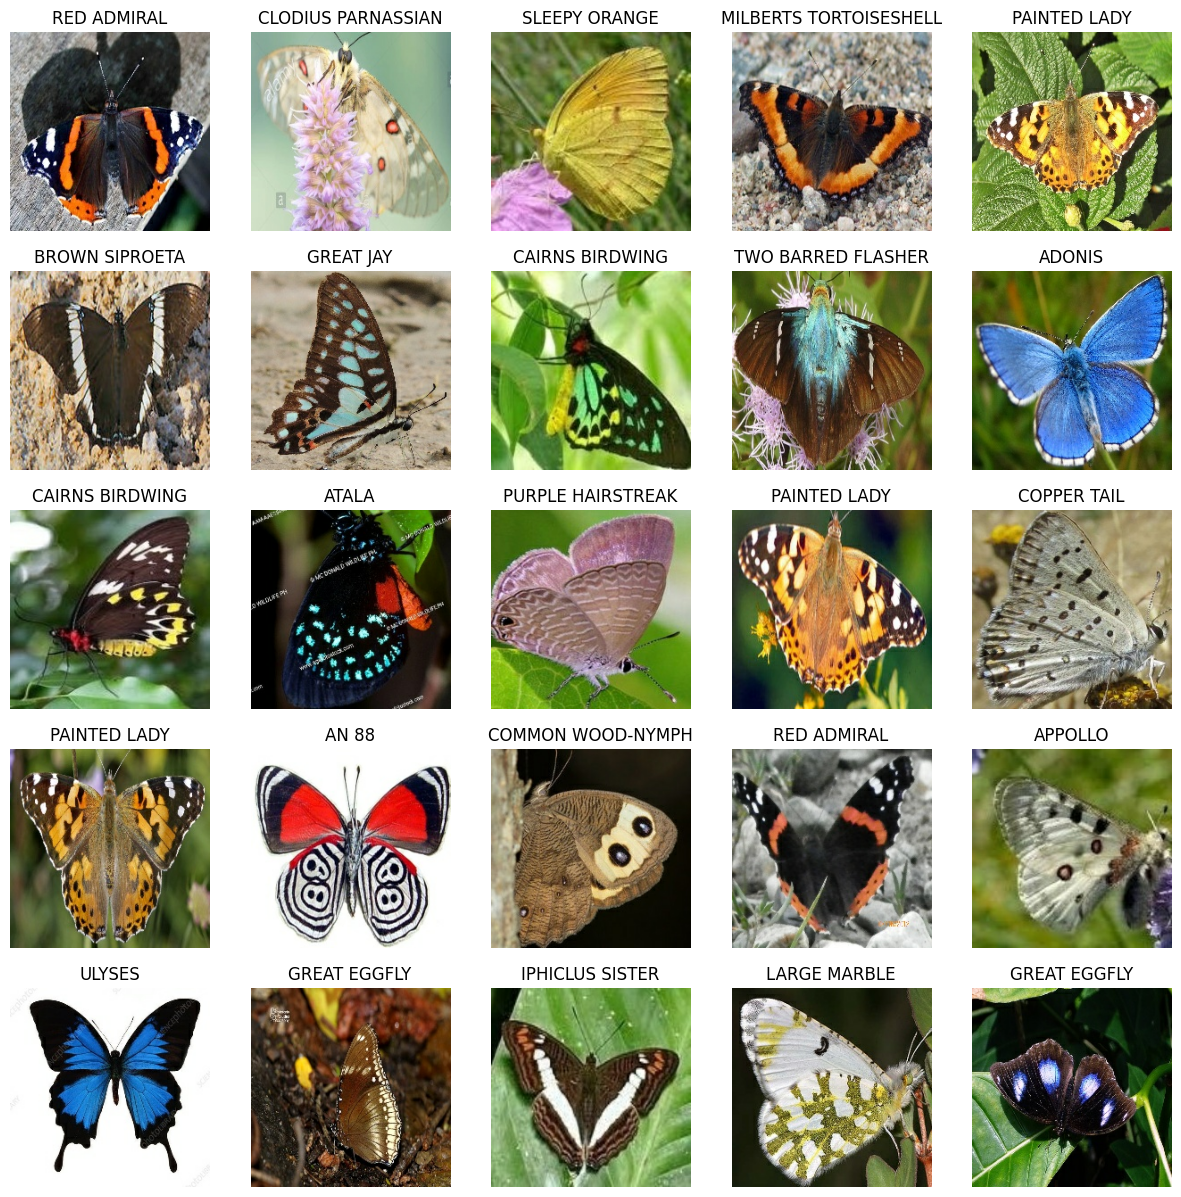

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_names = training_data.class_names
NUM_IMAGES = 25

plt.figure(figsize=(15, 15))

for images, labels in training_data.take(1):
    for j in range(NUM_IMAGES):
        axis = plt.subplot(5, 5, j + 1)
        plt.imshow(np.asarray(images[j]).astype("uint8"))
        plt.title(class_names[labels[j]])
        plt.axis("off")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Cấu hình
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 5  # Có thể tăng nếu muốn

# Load dữ liệu
train_data = image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/train",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_data = image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/val",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_data = image_dataset_from_directory(
    "/content/butterfly-data/butterfly-classification/test",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Load ResNet50 (không có phần top, dùng như backbone)
resnet_base = ResNet50(
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
resnet_base.trainable = False  # Không cập nhật trọng số ResNet

# Xây mô hình
model = models.Sequential([
    layers.Rescaling(1./255),  # Chuẩn hóa ảnh
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(train_data.class_names), activation='softmax')  # Softmax cho phân lớp
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Found 9285 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


Epoch 1/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 1557s 5s/step - accuracy: 0.0252 - loss: 4.3028 - val_accuracy: 0.0480 - val_loss: 3.9984
Epoch 2/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 1591s 5s/step - accuracy: 0.0528 - loss: 3.9911 - val_accuracy: 0.0800 - val_loss: 3.7548
Epoch 3/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 1546s 5s/step - accuracy: 0.0751 - loss: 3.8262 - val_accuracy: 0.1280 - val_loss: 3.6416
Epoch 4/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 1518s 5s/step - accuracy: 0.0917 - loss: 3.6965 - val_accuracy: 0.1547 - val_loss: 3.5027
Epoch 5/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 1500s 5s/step - accuracy: 0.1068 - loss: 3.6156 - val_accuracy: 0.1707 - val_loss: 3.4208


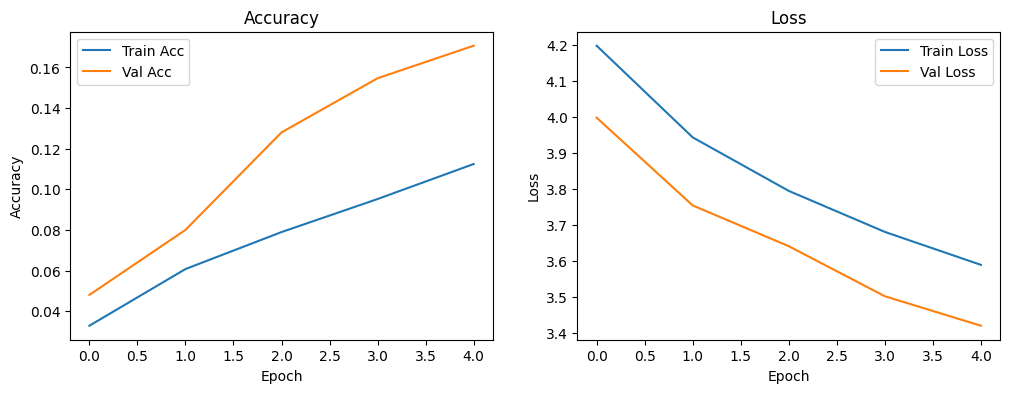

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


# New Section

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_data, epochs=20, validation_data=valid_data, callbacks=[early_stopping])

Epoch 1/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1656s 6s/step - accuracy: 0.3563 - loss: 2.5889 - val_accuracy: 0.8373 - val_loss: 0.7836
Epoch 2/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1651s 6s/step - accuracy: 0.6708 - loss: 1.1562 - val_accuracy: 0.8560 - val_loss: 0.5572
Epoch 3/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1630s 6s/step - accuracy: 0.7439 - loss: 0.8650 - val_accuracy: 0.8773 - val_loss: 0.4714
Epoch 4/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1653s 6s/step - accuracy: 0.7831 - loss: 0.7332 - val_accuracy: 0.8987 - val_loss: 0.3518
Epoch 5/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1684s 6s/step - accuracy: 0.8068 - loss: 0.6494 - val_accuracy: 0.8960 - val_loss: 0.3682
Epoch 6/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1658s 6s/step - accuracy: 0.8133 - loss: 0.6194 - val_accuracy: 0.9067 - val_loss: 0.3174
Epoch 7/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1708s 6s/step - accuracy: 0.8214 - loss: 0.5815 - val_accuracy: 0.9093 - val_loss: 0.3029
Epoch 8/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 1645s 6s/step - accuracy: 0.8302 - loss: 0.5429 - 

Found 9285 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
Found 375 files belonging to 75 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 778s 3s/step - accuracy: 0.3278 - loss: 2.9782 - val_accuracy: 0.8640 - val_loss: 0.7345
Epoch 2/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 810s 3s/step - accuracy: 0.7664 - loss: 0.8798 - val_accuracy: 0.9067 - val_loss: 0.4460
Epoch 3/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 787s 3s/step - accuracy: 0.8343 - loss: 0.5764 - val_accuracy: 0.9147 - val_loss: 0.3440
Epoch 4/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 774s 3s/step - accuracy: 0.8670 - loss: 0.4679 - val_accuracy: 0.9200 - val_loss: 0.2842
Epoch 5/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 771s 3s/step - accuracy: 0.8863 - loss: 0.3986 - val_accuracy: 0.9200 - val_loss: 0.2733
Epoch 6/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 799s 3s/step - accuracy: 0.8942 - loss: 0.3660 - val_accuracy: 0.9280 - val_loss: 0.2480
Epoch 7/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 779s 3s/step - accuracy: 0.9013 - loss: 0.3208 - val_accuracy: 0.9333 - val_loss: 0.2218
Epoch 8/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 717s 2s/step - accuracy: 0.9113 - loss: 0.3023 - val_accu

Test Accuracy: 0.9360, Test Loss: 0.2189


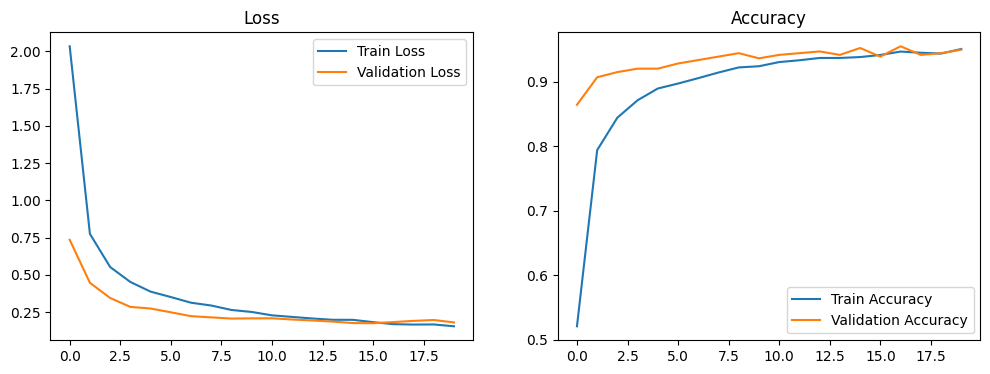

In [14]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
import matplotlib.pyplot as plt

# Cấu hình
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20
DATA_DIR = "/content/butterfly-data/butterfly-classification"

# Tải dữ liệu
train_data = image_dataset_from_directory(
    DATA_DIR + "/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE
)
valid_data = image_dataset_from_directory(
    DATA_DIR + "/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE
)
test_data = image_dataset_from_directory(
    DATA_DIR + "/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE
)

# Lưu class_names trước khi tiền xử lý
NUM_CLASSES = len(train_data.class_names)
class_names = train_data.class_names  # Lưu danh sách tên lớp

# Tiền xử lý với preprocess_input của EfficientNetB0
def preprocess(ds):
    return ds.map(lambda x, y: (preprocess_input(x), y))
train_data = preprocess(train_data)
valid_data = preprocess(valid_data)
test_data = preprocess(test_data)

# Tăng cường dữ liệu
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# Tạo mô hình EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
base_model.trainable = False  # Không huấn luyện base model ban đầu

# Xây dựng mô hình
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')  # Sử dụng NUM_CLASSES
])

# Biên dịch
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# In tóm tắt mô hình
model.summary()

# Huấn luyện
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_data, epochs=EPOCHS, validation_data=valid_data, callbacks=[early_stopping])

# Đánh giá
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# Lưu mô hình
model.save('butterfly_classifier_efficientnetb0.h5')

# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

Vui lòng tải lên tệp JPG hợp lệ (đảm bảo không phải tệp metadata bắt đầu bằng '._').


Saving 3.jpg to 3 (1).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


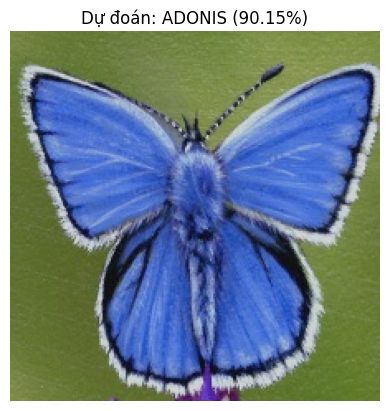

In [32]:
from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import os

# Tải mô hình
try:
    model = load_model('butterfly_classifier_efficientnetb0.h5')
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
except FileNotFoundError:
    print("Không tìm thấy tệp mô hình 'butterfly_classifier_efficientnetb0.h5'. Vui lòng tải mô hình lên hoặc huấn luyện lại.")
    exit()

# Danh sách lớp (75 loài bướm)
class_names = ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO',
               'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE',
               'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA',
               'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT',
               'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL',
               'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY',
               'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT',
               'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART',
               'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE',
               'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL',
               'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW',
               'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW',
               'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRAL',
               'RED CRACKER', 'RED POSTMAN', 'RED SPOTTED PURPLE', 'SCARCE SWALLOW',
               'SILVER SPOT SKIPPER', 'SLEEPY ORANGE', 'SOOTYWING', 'SOUTHERN DOGFACE',
               'STRAITED QUEEN', 'TROPICAL LEAFWING', 'TWO BARRED FLASHER', 'ULYSES',
               'VICEROY', 'WOOD SATYR', 'YELLOW SWALLOW TAIL', 'ZEBRA LONG WING']

# Tải hình ảnh
print("Vui lòng tải lên tệp JPG hợp lệ (đảm bảo không phải tệp metadata bắt đầu bằng '._').")
uploaded = files.upload()

# Lấy tên tệp đầu tiên
image_path = '/content/' + list(uploaded.keys())[0]

# Kiểm tra và đổi tên tệp nếu có ký tự đặc biệt
if image_path.startswith('/content/._'):
    new_image_path = '/content/butterfly.jpg'
    os.rename(image_path, new_image_path)
    image_path = new_image_path
    print(f"Đã đổi tên tệp thành: {image_path}")

# Kiểm tra xem tệp có tồn tại và hợp lệ không
if not os.path.exists(image_path):
    print(f"Không tìm thấy tệp tại: {image_path}")
else:
    try:
        # Kiểm tra kích thước tệp
        file_size = os.path.getsize(image_path)
        if file_size < 1000:  # Kích thước nhỏ hơn 1KB
            print(f"Tệp '{image_path}' có kích thước {file_size} bytes, có thể không phải hình ảnh hợp lệ.")
        else:
            # Tải và tiền xử lý hình ảnh
            img = load_img(image_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            # Dự đoán
            predictions = model.predict(img_array)
            predicted_class = np.argmax(predictions[0])
            predicted_label = class_names[predicted_class]
            confidence = predictions[0][predicted_class] * 100

            # Hiển thị kết quả
            plt.imshow(img)
            plt.title(f"Dự đoán: {predicted_label} ({confidence:.2f}%)")
            plt.axis('off')
            plt.show()

    except UnidentifiedImageError:
        print(f"Tệp '{image_path}' không phải là hình ảnh JPG hợp lệ. Vui lòng tải lên một tệp JPG hoặc PNG khác.")
    except Exception as e:
        print(f"Lỗi khi xử lý hình ảnh: {str(e)}")